In [1]:
%run uvms_dynamics.ipynb

jit after {'jit': True, 'jit_options': {'flags': '-Ofast'}, 'compiler': 'shell'}
number of joints = 4
floating_base found
floating_base found
floating_base found


In [2]:
# conditional function instances
# coupled forward dynamics of uvms
x_next_coupled, states, u, dt, q_min, q_max, parameters_coupled, base_T  = rig_dyn.forward_dynamics(gravity=9.81, 
                                                                                    floating_base_id=tau_F,
                                                                                    floating_base_bias_f=b_F , 
                                                                                    J_uv = J_uv, 
                                                                                    coupled=True)
x_next_coupled_eval = cs.Function('UVMSnext_coupled', [states, u, dt, parameters_coupled, base_T ,q_min, q_max], [x_next_coupled])


# decoupled forward dynamics of uvms
x_next_decoupled, states, u, dt, q_min, q_max, parameters_decoupled, base_T  = rig_dyn.forward_dynamics(gravity=9.81, 
                                                                                    floating_base_id=tau_F,
                                                                                    floating_base_bias_f=b_F , 
                                                                                    J_uv = J_uv, 
                                                                                    coupled=False)

x_next_decoupled_eval = cs.Function('UVMSnext_decoupled', [states, u, dt, parameters_decoupled, base_T ,q_min, q_max], [x_next_decoupled])



UVMSnext_use_coupled = cs.Function.if_else('UVMSnext_use_coupled', x_next_coupled_eval, x_next_decoupled_eval)

floating_base found
floating_base found
floating_base found
floating_base found
floating_base found
floating_base found


In [3]:
# # c , cpp or matlab code generation for forward dynamics
# x_next_eval.generate("x_next_eval.c")
# os.system(f"gcc -fPIC -shared x_next_eval.c -o libUVMS_coupled.so")

In [4]:
st_x0 = cs.vertcat(0,0,0, 0,0,0, 1.91318, 1.33339, 0.99245, 3.16073, 0, 0, 0, 0, 0, 0, 0.00751799, -0.0073626, 0.00281749, 0.0222385)
u0 = cs.vertcat(0, 0, 0, 0, 0, 0, 0.0340454, -0.00441695, 0.0062739, -0.00505981)

UVMSnext_use_coupled(True, st_x0, u0, alpha.delta_t, alpha.sim_p, alpha.base_T0, alpha.joint_min, alpha.joint_max)


DM([2.70929e-07, 3.05948e-07, 8.30685e-05, 1.86926e-06, 9.2489e-06, 2.78552e-05, 1.91372, 1.5, 0.992592, 3.16066, 7.10079e-06, 7.30006e-06, -8.21378e-05, 6.22141e-05, 0.000221834, 0.000641546, 0.0113435, 0, 0, 0])

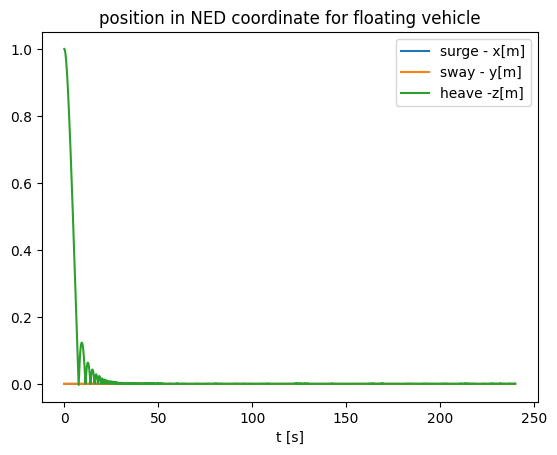

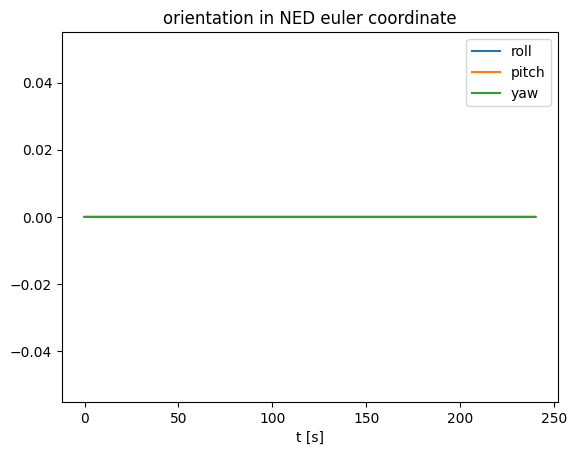

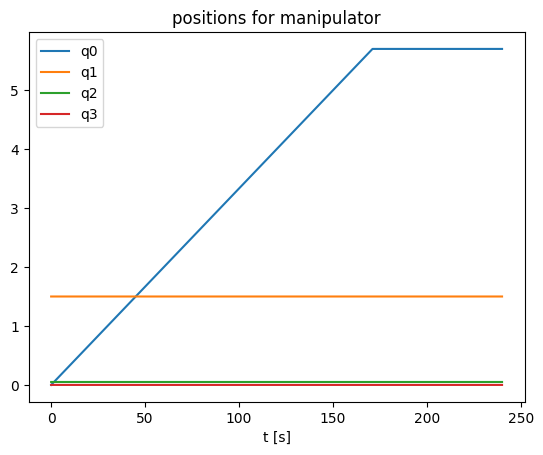

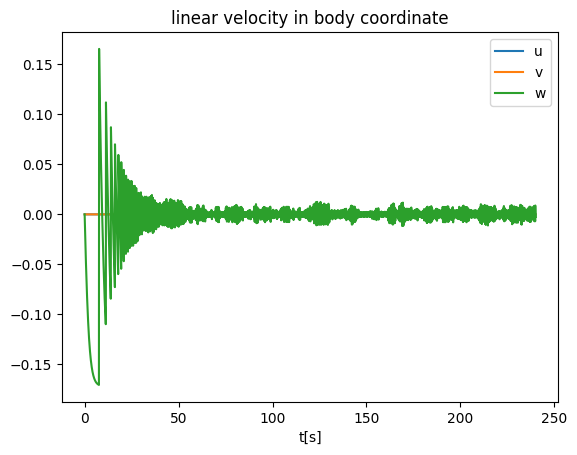

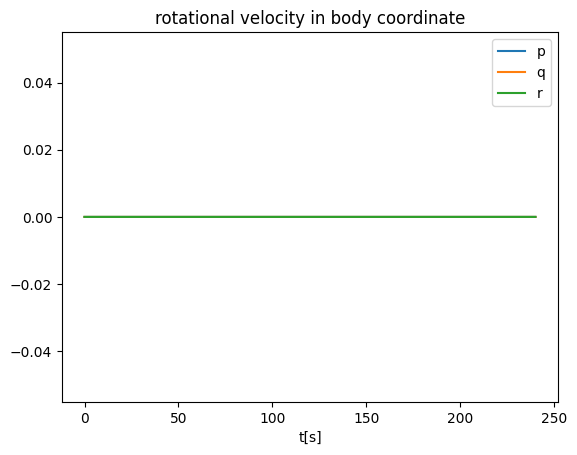

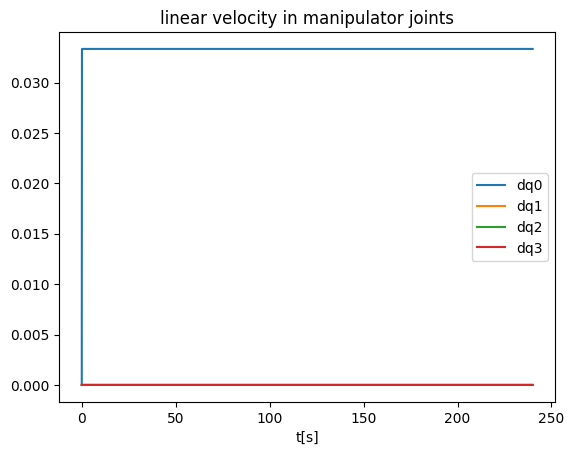

In [5]:
sim = x_next_decoupled_eval.mapaccum(alpha.N)
x0 = np.array([0, 0, 1, 0, 0, 0, 0.0, 1.5, 0.05, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) #x y z r p y q0 q1 q2 q3 u v w p q r qd0 qd1 qd2 qd3 qd4
u0 = np.array([0, 0.0, 0, 0, 0, 0, 0.1, 0, 0, 0])
res = sim(x0, u0, alpha.delta_t, alpha.sim_p,  alpha.base_T0, alpha.joint_min, alpha.joint_max)
t = np.linspace(0, alpha.sim_n, alpha.N+1)


# Create a figure and plot the data
plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((20,1)), res.toarray()), axis=1)[0:3,:].T)
plt.legend(['surge - x[m]', 'sway - y[m]', 'heave -z[m]'])
plt.title("position in NED coordinate for floating vehicle")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((20,1)), res.toarray()), axis=1)[3:6,:].T)
plt.legend(['roll', 'pitch', 'yaw'])
plt.title("orientation in NED euler coordinate")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((20,1)), res.toarray()), axis=1)[6:10,:].T)
plt.legend(['q0', 'q1', 'q2', 'q3'])
plt.title("positions for manipulator")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((20,1)), res.toarray()), axis=1)[10:13,:].T)
plt.legend(['u', 'v', 'w'])
plt.xlabel('t[s]')
plt.title("linear velocity in body coordinate")
plt.show()

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((20,1)), res.toarray()), axis=1)[13:16,:].T)
plt.legend(['p', 'q', 'r'])
plt.xlabel('t[s]')
plt.title("rotational velocity in body coordinate")
plt.show()

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((20,1)), res.toarray()), axis=1)[16:20,:].T)
plt.legend(['dq0', 'dq1', 'dq2', 'dq3'])
plt.xlabel('t[s]')
plt.title("linear velocity in manipulator joints")
plt.show()